In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

## Load Dataset

In [2]:
diabetes = pd.read_csv("data/raw/diabetes.csv")
X_train = pd.read_csv("data/processed/X_train.csv")
y_train = pd.read_csv("data/processed/y_train.csv")
X_test = pd.read_csv("data/processed/X_test.csv")
y_test = pd.read_csv("data/processed/y_test.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,150,78,29,126,35.2,0.692,54
1,4,97,60,23,0,28.2,0.443,22
2,0,165,90,33,680,52.3,0.427,23
3,1,109,56,21,135,25.2,0.833,23
4,8,120,0,0,0,30.0,0.183,38


In [5]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,199,76,43,0,42.9,1.394,22
1,2,107,74,30,100,33.6,0.404,23
2,4,76,62,0,0,34.0,0.391,25
3,5,166,72,19,175,25.8,0.587,51
4,0,111,65,0,0,24.6,0.660,31


### Now, we will use KNN Regressor, we will use hyperparameter n_neighbors = 10.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)  # You can tune n_neighbors later
knn.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
knn.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### We are going to evaluate our model performance with R-Squared

In [8]:
knn.score(X_test, y_test)

0.7922077922077922

### Normalisation

In [9]:
normalizer = MinMaxScaler()

### Fit to our training data

In [10]:
normalizer.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


### Transforming our training and testing data

In [11]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [12]:
X_train_norm

array([[0.41176471, 0.75757576, 0.63934426, ..., 0.52459016, 0.26216909,
        0.55      ],
       [0.23529412, 0.48989899, 0.49180328, ..., 0.42026826, 0.1558497 ,
        0.01666667],
       [0.        , 0.83333333, 0.73770492, ..., 0.77943368, 0.14901793,
        0.03333333],
       ...,
       [0.23529412, 0.47474747, 0.53278689, ..., 0.3681073 , 0.02988898,
        0.        ],
       [0.64705882, 0.42929293, 0.60655738, ..., 0.4485842 , 0.09479078,
        0.23333333],
       [0.29411765, 0.68686869, 0.67213115, ..., 0.        , 0.23996584,
        0.8       ]], shape=(614, 8))

In [13]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.411765,0.757576,0.639344,0.292929,0.148936,0.524590,0.262169,0.550000
1,0.235294,0.489899,0.491803,0.232323,0.000000,0.420268,0.155850,0.016667
2,0.000000,0.833333,0.737705,0.333333,0.803783,0.779434,0.149018,0.033333
3,0.058824,0.550505,0.459016,0.212121,0.159574,0.375559,0.322374,0.033333
4,0.470588,0.606061,0.000000,0.000000,0.000000,0.447094,0.044833,0.283333


In [14]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,1.005051,0.622951,0.434343,0.000000,0.639344,0.561913,0.016667
1,0.117647,0.540404,0.606557,0.303030,0.118203,0.500745,0.139197,0.033333
2,0.235294,0.383838,0.508197,0.000000,0.000000,0.506706,0.133646,0.066667
3,0.294118,0.838384,0.590164,0.191919,0.206856,0.384501,0.217336,0.500000
4,0.000000,0.560606,0.532787,0.000000,0.000000,0.366617,0.248506,0.166667


### KNN classifier modelling

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors later


In [16]:
knn.fit(X_train_norm, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
knn.score(X_test_norm, y_test)

0.7792207792207793

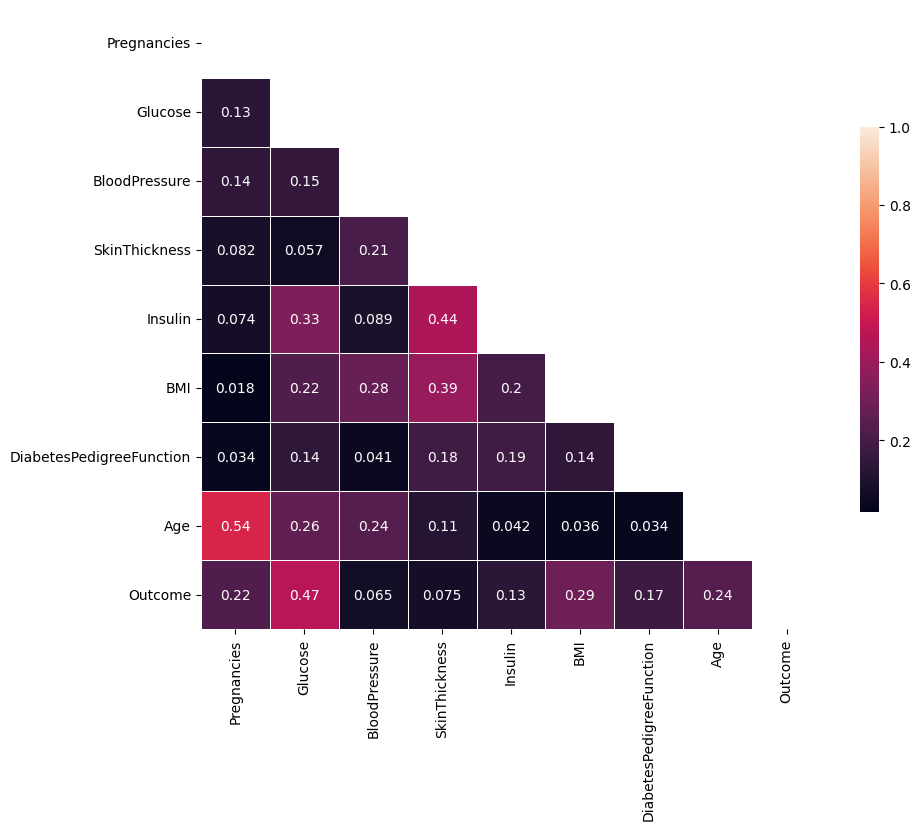

In [18]:
corr=np.abs(diabetes.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [19]:
X_train_norm.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [20]:
X_train_reduced = X_train_norm.drop(columns = ['BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction'])
X_test_reduced = X_test_norm.drop(columns = ['BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction'])

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_reduced, y_train)

knn.score(X_test_reduced, y_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8051948051948052

## Linear Regression

In [22]:
lin_reg = LinearRegression()

Training Linear Regression with our normalized data

In [23]:
lin_reg.fit(X_train_norm, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
pred = lin_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", lin_reg.score(X_test_norm, y_test))

MAE 0.3193161056243206
RMSE 0.3790863864364127
R2 score 0.32230203252064227


In [25]:
X_train_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.411765,0.757576,0.639344,0.292929,0.148936,0.524590,0.262169,0.550000
1,0.235294,0.489899,0.491803,0.232323,0.000000,0.420268,0.155850,0.016667
2,0.000000,0.833333,0.737705,0.333333,0.803783,0.779434,0.149018,0.033333
3,0.058824,0.550505,0.459016,0.212121,0.159574,0.375559,0.322374,0.033333
4,0.470588,0.606061,0.000000,0.000000,0.000000,0.447094,0.044833,0.283333


In [26]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_norm.columns, lin_reg.coef_[0])}
lin_reg_coef

{'Pregnancies': np.float64(0.2661049435602041),
 'Glucose': np.float64(1.1588260634322685),
 'BloodPressure': np.float64(-0.30336581331800866),
 'SkinThickness': np.float64(0.07310541865414029),
 'Insulin': np.float64(-0.19437820446222406),
 'BMI': np.float64(0.9156084161292927),
 'DiabetesPedigreeFunction': np.float64(0.33347975009249),
 'Age': np.float64(0.2140557366317226)}

In [27]:
lin_reg.coef_

array([[ 0.26610494,  1.15882606, -0.30336581,  0.07310542, -0.1943782 ,
         0.91560842,  0.33347975,  0.21405574]])

📊 Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

ROC-AUC: 0.7664545635315172

📊 Decision Tree Performance
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154

ROC-AUC: 0.7363292901173195

📊 Random Forest Performance
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                      

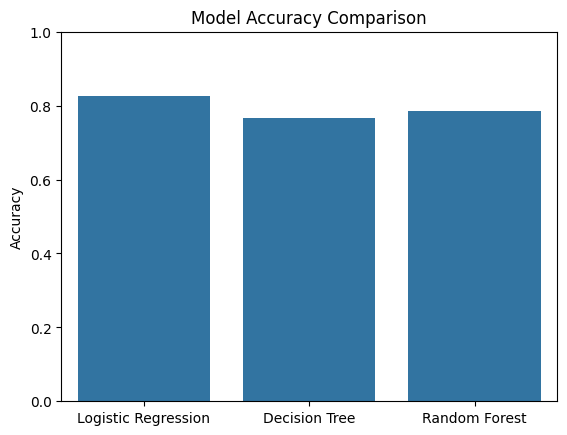

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}

📊 Tuned Random Forest Performance
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.71      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154

ROC-AUC: 0.7630741698150726


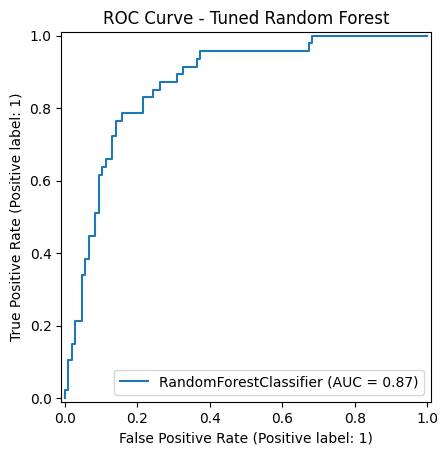

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# -------------------------------
# 📂 Load Processed Data
# -------------------------------
X_train = pd.read_csv("data/processed/X_train.csv")
y_train = pd.read_csv("data/processed/y_train.csv")
X_test = pd.read_csv("data/processed/X_test.csv")
y_test = pd.read_csv("data/processed/y_test.csv")

# Ensure y_train/y_test are Series (not DataFrames)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# -------------------------------
# ⚙️ Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 🧠 Baseline Model - Logistic Regression
# -------------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("📊 Logistic Regression Performance")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log))

# -------------------------------
# 🌳 Decision Tree Classifier
# -------------------------------
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("\n📊 Decision Tree Performance")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dt))

# -------------------------------
# 🌲 Random Forest Classifier
# -------------------------------
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("\n📊 Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

# -------------------------------
# 🧮 Compare Model Accuracies
# -------------------------------
model_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
}

sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# -------------------------------
# 🔍 Hyperparameter Tuning (Example: Random Forest)
# -------------------------------
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=3, scoring="accuracy")
grid_rf.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)

print("\n📊 Tuned Random Forest Performance")
print(classification_report(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_best))

# -------------------------------
# 📉 ROC Curve for the Best Model
# -------------------------------
RocCurveDisplay.from_estimator(best_rf, X_test_scaled, y_test)
plt.title("ROC Curve - Tuned Random Forest")
plt.show()

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Example: XGBoost
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       107
           1       0.66      0.74      0.70        47

    accuracy                           0.81       154
   macro avg       0.77      0.79      0.78       154
weighted avg       0.81      0.81      0.81       154

ROC-AUC: 0.7882282759992045


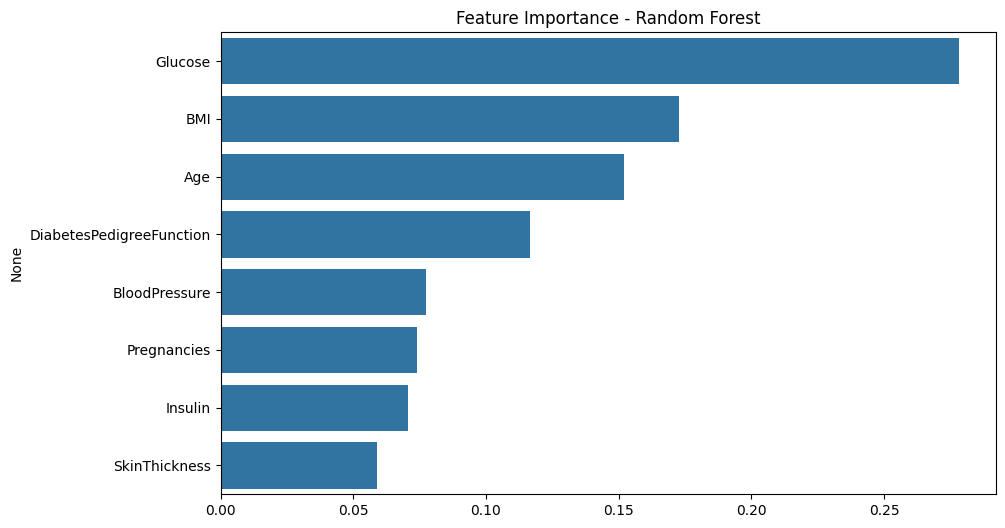

In [30]:
import numpy as np

# For Random Forest or XGBoost
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title("Feature Importance - Random Forest")
plt.show()